<a href="https://colab.research.google.com/github/txusser/Master_IA_Sanidad/blob/main/Modulo_3/PyDICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
pip install pydicom pillow numpy cython pynetdicom

In [126]:
import os,pydicom
from pathlib import Path
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.dataset import Dataset

In [127]:
import matplotlib.pyplot as plt
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

print(ds)

"""Remaninder:
SOP: Service-Object Pair (SOP)
UID: DICOM Unique Identifiers
"""

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.5962.1.1.1.1.1.20040119072730.12322
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.5962.2
(0002, 0013) Implementation Version Name         SH: 'DCTOOL100'
(0002, 0016) Source Application Entity Title     AE: 'CLUNIE1'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20040119'
(0008, 0013) Instance Creation Time              TM: '072731'
(0008, 0014) Instance Creator UID                U

'Remaninder:\nSOP: Service-Object Pair (SOP)\nUID: DICOM Unique Identifiers\n'


File path........: /usr/local/lib/python3.7/dist-packages/pydicom/data/test_files/CT_small.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: CompressedSamples, CT1
Patient ID.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128
Pixel Spacing....: [0.661468, 0.661468]
Slice location...: -77.2040634155


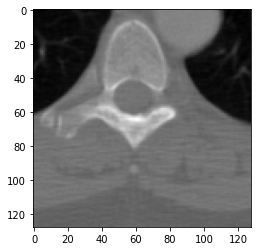

In [92]:
# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()



In [93]:
elem = ds[0x0010, 0x0010]
elem.value

'CompressedSamples^CT1'

In [94]:
elem.value = 'Citizen^Jan'
elem

(0010, 0010) Patient's Name                      PN: 'Citizen^Jan'

In [77]:
ds.save_as('out.dcm')

In [118]:
from pynetdicom import AE, debug_logger
from pynetdicom.sop_class import ModalityWorklistInformationFind, PatientRootQueryRetrieveInformationModelGet, MediaStorageDirectoryStorage
debug_logger()

In [119]:
# Initialise the Application Entity
ae = AE()
# Add a requested presentation context
ae.add_requested_context(ModalityWorklistInformationFind)
ae.add_requested_context(PatientRootQueryRetrieveInformationModelGet)
ae.add_requested_context(MediaStorageDirectoryStorage)

In [113]:
# Create our Identifier (query) dataset
ds = Dataset()
ds.PatientName = 'Pepe Perez'
ds.ScheduledProcedureStepSequence = [Dataset()]
item = ds.ScheduledProcedureStepSequence[0]
item.ScheduledStationAETitle = 'CTSCANNER'
item.ScheduledProcedureStepStartDate = '20181005'
item.Modality = 'CT'
print(ds)

(0010, 0010) Patient's Name                      PN: 'Pepe Perez'
(0040, 0100)  Scheduled Procedure Step Sequence  1 item(s) ---- 
   (0008, 0060) Modality                            CS: 'CT'
   (0040, 0001) Scheduled Station AE Title          AE: 'CTSCANNER'
   (0040, 0002) Scheduled Procedure Step Start Date DA: '20181005'
   ---------


In [114]:
# Associate with peer AE
# https://www.dicomserver.co.uk/
assoc = ae.associate("www.dicomserver.co.uk", 11112)
if assoc.is_established:
  for cx in assoc.accepted_contexts:
    print('Context: {}, SCP role: {}, SCU role: {}'.format(cx.abstract_syntax, cx.as_scp, cx.as_scu))

I: Requesting Association
D: Request Parameters:
D: ======================= OUTGOING A-ASSOCIATE-RQ PDU ========================
D: Our Implementation Class UID:      1.2.826.0.1.3680043.9.3811.2.0.1
D: Our Implementation Version Name:   PYNETDICOM_201
D: Application Context Name:    1.2.840.10008.3.1.1.1
D: Calling Application Name:    PYNETDICOM
D: Called Application Name:     ANY-SCP
D: Our Max PDU Receive Size:    16382
D: Presentation Contexts:
D:   Context ID:        1 (Proposed)
D:     Abstract Syntax: =Modality Worklist Information Model - FIND
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little Endian
D:       =Explicit VR Little Endian
D:       =Deflated Explicit VR Little Endian
D:       =Explicit VR Big Endian
D:   Context ID:        3 (Proposed)
D:     Abstract Syntax: =Patient Root Query/Retrieve Information Model - GET
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little En

Context: 1.2.840.10008.5.1.4.31, SCP role: False, SCU role: True
Context: 1.2.840.10008.5.1.4.1.2.1.3, SCP role: False, SCU role: True


In [115]:
if assoc.is_established:
    # Use the C-FIND service to send the identifier
    responses = assoc.send_c_find(ds, ModalityWorklistInformationFind)
    for (status, identifier) in responses:
        if status:
            print('C-FIND query status: 0x{0:04x}'.format(status.Status))
        else:
            print('Connection timed out, was aborted or received invalid response')

    # Release the association
    assoc.release()
else:
    print('Association rejected, aborted or never connected')

I: Sending Find Request: MsgID 1
I: 
I: # Request Identifier
I: (0010,0010) PN [Pepe Perez]                             # 1 PatientName
I: (0040,0100) SQ (Sequence with 1 item)                   # 1 ScheduledProcedureStepSequence
I:   (Sequence item #1)
I:     (0008,0060) CS [CT]                                     # 1 Modality
I:     (0040,0001) AE [CTSCANNER]                              # 1 ScheduledStationAETitle
I:     (0040,0002) DA [20181005]                               # 1 ScheduledProcedureStepStartDate
I: 
D: ========================== OUTGOING DIMSE MESSAGE ==========================
D: Message Type                  : C-FIND RQ
D: Presentation Context ID       : 1
D: Message ID                    : 1
D: Affected SOP Class UID        : Modality Worklist Information Model - FIND
D: Identifier                    : Present
D: Priority                      : Low
D: ============================ END DIMSE MESSAGE =============================
D: pydicom.read_dataset() TransferSyn

C-FIND query status: 0x0000


In [116]:
ds = Dataset()
ds.SOPClassesInStudy = ''
ds.PatientID = ''
ds.StudyInstanceUID = ''
ds.QueryRetrieveLevel = 'STUDY'

assoc = ae.associate("www.dicomserver.co.uk", 11112)
if assoc.is_established:
    # Use the C-FIND service to send the identifier
    responses = assoc.send_c_find(ds, ModalityWorklistInformationFind)
    for (status, identifier) in responses:
        if status:
            print('C-FIND query status: 0x{0:04x}'.format(status.Status))
        else:
            print('Connection timed out, was aborted or received invalid response')

    # Release the association
    assoc.release()
else:
    print('Association rejected, aborted or never connected')

I: Requesting Association
D: Request Parameters:
D: ======================= OUTGOING A-ASSOCIATE-RQ PDU ========================
D: Our Implementation Class UID:      1.2.826.0.1.3680043.9.3811.2.0.1
D: Our Implementation Version Name:   PYNETDICOM_201
D: Application Context Name:    1.2.840.10008.3.1.1.1
D: Calling Application Name:    PYNETDICOM
D: Called Application Name:     ANY-SCP
D: Our Max PDU Receive Size:    16382
D: Presentation Contexts:
D:   Context ID:        1 (Proposed)
D:     Abstract Syntax: =Modality Worklist Information Model - FIND
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little Endian
D:       =Explicit VR Little Endian
D:       =Deflated Explicit VR Little Endian
D:       =Explicit VR Big Endian
D:   Context ID:        3 (Proposed)
D:     Abstract Syntax: =Patient Root Query/Retrieve Information Model - GET
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little En

C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00


I: 
I: # Response Identifier
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
I: (0010,0020) LO [PAT008]                                 # 1 PatientID
I: (0020,000D) UI [1.2.826.0.1.3680043.11.110]             # 1 StudyInstanceUID
I: 
D: 
I: Find SCP Response: 11 - 0xFF00 (Pending)
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
D: pydicom.read_dataset() TransferSyntax="Little Endian Explicit"
I: 
I: # Response Identifier
I: (0010,0020) LO [PAT008]                                 # 1 PatientID
I: (0020,000D) UI [1.2.826.0.1.3680043.11.111]             # 1 StudyInstanceUID
I: 
D: 
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
I: Find SCP Response: 12 - 0xFF00 (Pending)
D: pydicom.read_dataset() TransferSyntax="Little Endian Explicit"
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
I: 
I: # Response Identifier
I: (0010,0020) LO [PAT009]                                 # 1 PatientID
I: (0020,000D) UI [1.2.826.0.1.368

C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00


I: Find SCP Response: 20 - 0xFF00 (Pending)
D: pydicom.read_dataset() TransferSyntax="Little Endian Explicit"
I: 
I: # Response Identifier
I: (0010,0020) LO [PAT015]                                 # 1 PatientID
I: (0020,000D) UI [1.2.826.0.1.3680043.11.120]             # 1 StudyInstanceUID
I: 
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
D: 
I: Find SCP Response: 21 - 0xFF00 (Pending)
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
D: pydicom.read_dataset() TransferSyntax="Little Endian Explicit"
I: 
I: # Response Identifier
I: (0010,0020) LO [PAT016]                                 # 1 PatientID
I: (0020,000D) UI [1.2.826.0.1.3680043.11.121]             # 1 StudyInstanceUID
I: 
D: 
D: pydicom.read_dataset() TransferSyntax="Little Endian Implicit"
I: Find SCP Response: 22 - 0xFF00 (Pending)
D: pydicom.read_dataset() TransferSyntax="Little Endian Explicit"
I: 
I: # Response Identifi

C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00
C-FIND query status: 0xff00


D: 
I: Find SCP Result: 0x0000 (Success)
I: Releasing Association


C-FIND query status: 0xff00
C-FIND query status: 0x0000


In [117]:

ds = Dataset()
ds.SOPClassesInStudy = ''
ds.PatientID = 'PAT004'
ds.StudyInstanceUID = '1.2.826.0.1.3680043.11.106'
ds.QueryRetrieveLevel = 'STUDY'

assoc = ae.associate("www.dicomserver.co.uk", 11112)
if assoc.is_established:
    # Use the C-GET service to send the identifier
    responses = assoc.send_c_get(ds, PatientRootQueryRetrieveInformationModelGet)
    for (status, identifier) in responses:
        if status:
            print('C-GET query status: 0x{0:04x}'.format(status.Status))
        else:
            print('Connection timed out, was aborted or received invalid response')

    # Release the association
    assoc.release()
else:
    print('Association rejected, aborted or never connected')

I: Requesting Association
D: Request Parameters:
D: ======================= OUTGOING A-ASSOCIATE-RQ PDU ========================
D: Our Implementation Class UID:      1.2.826.0.1.3680043.9.3811.2.0.1
D: Our Implementation Version Name:   PYNETDICOM_201
D: Application Context Name:    1.2.840.10008.3.1.1.1
D: Calling Application Name:    PYNETDICOM
D: Called Application Name:     ANY-SCP
D: Our Max PDU Receive Size:    16382
D: Presentation Contexts:
D:   Context ID:        1 (Proposed)
D:     Abstract Syntax: =Modality Worklist Information Model - FIND
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little Endian
D:       =Explicit VR Little Endian
D:       =Deflated Explicit VR Little Endian
D:       =Explicit VR Big Endian
D:   Context ID:        3 (Proposed)
D:     Abstract Syntax: =Patient Root Query/Retrieve Information Model - GET
D:     Proposed SCP/SCU Role: Default
D:     Proposed Transfer Syntaxes:
D:       =Implicit VR Little En

C-GET query status: 0x0000
